# Premier League 15 Years Analysis - Part 1

This comprehensive analysis examines 15 years of Premier League data spanning from the 2010-11 season through 2025-26. We'll explore team performance, create ultimate league tables, and analyze the dominance patterns of England's top flight football.

## Objectives:
- Combine 15 years of match data into a unified dataset
- Create an "Omega League Table" showing cumulative performance
- Analyze the traditional "Big Six" teams' trajectories
- Identify long-term trends and patterns in English football

## Data Source:
Individual CSV files for each Premier League season containing match results, statistics, and performance metrics.

In [82]:
# import the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path

# load every single data set
pl2026 = pd.read_csv('../data/PL_2026.csv')
pl2025 = pd.read_csv('../data/PL_2025.csv')
pl2024 = pd.read_csv('../data/PL_2024.csv')
pl2023 = pd.read_csv('../data/PL_2023.csv')
pl2022 = pd.read_csv('../data/PL_2022.csv')
pl2021 = pd.read_csv('../data/PL_2021.csv')
pl2020 = pd.read_csv('../data/PL_2020.csv')
pl2019 = pd.read_csv('../data/PL_2019.csv')
pl2018 = pd.read_csv('../data/PL_2018.csv')
pl2017 = pd.read_csv('../data/PL_2017.csv')
pl2016 = pd.read_csv('../data/PL_2016.csv')
pl2015 = pd.read_csv('../data/PL_2015.csv')
pl2014 = pd.read_csv('../data/PL_2014.csv')
pl2013 = pd.read_csv('../data/PL_2013.csv')
pl2012 = pd.read_csv('../data/PL_2012.csv')
pl2011 = pd.read_csv('../data/PL_2011.csv')
pl2010 = pd.read_csv('../data/PL_2010.csv')

# you loaded it -- next up, make the omega data set with all seasons combined

## Data Exploration

Understanding our dataset structure is crucial before analysis. Each season file contains match-by-match data including:
- Match details (date, time, teams, referee)
- Full-time and half-time results
- Key statistics (shots, fouls, cards, corners)
- Betting odds (which we'll exclude from analysis)

Let's examine the column structure to ensure consistency across seasons.

In [83]:
print(pl2026.columns.tolist())

['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BFDH', 'BFDD', 'BFDA', 'BMGMH', 'BMGMD', 'BMGMA', 'BVH', 'BVD', 'BVA', 'BWH', 'BWD', 'BWA', 'CLH', 'CLD', 'CLA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'BFEH', 'BFED', 'BFEA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'BFE>2.5', 'BFE<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'BFEAHH', 'BFEAHA', 'B365CH', 'B365CD', 'B365CA', 'BFDCH', 'BFDCD', 'BFDCA', 'BMGMCH', 'BMGMCD', 'BMGMCA', 'BVCH', 'BVCD', 'BVCA', 'BWCH', 'BWCD', 'BWCA', 'CLCH', 'CLCD', 'CLCA', 'LBCH', 'LBCD', 'LBCA', 'PSCH', 'PSCD', 'PSCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'BFECH', 'BFECD', 'BFECA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2

## Data Cleaning and Combination

The challenge with multi-season analysis is ensuring data consistency. Different seasons may have:
- Varying column structures
- Additional betting market columns
- Different statistical tracking methods

Our approach:
1. **Standardize columns**: Keep only core match data (before betting odds)
2. **Align structures**: Ensure all seasons have identical column sets
3. **Combine efficiently**: Use pandas concat for optimal performance

This creates a robust foundation for 15-year analysis spanning **6,140 total matches**.

In [84]:
# cutoff is B365H
DATA_DIR = "../data"  # adjust if needed

def load_trim(fp: Path) -> pd.DataFrame:
    df = pd.read_csv(fp)
    if "B365H" in df.columns:
        df = df.iloc[:, : df.columns.get_loc("B365H")]  # drop odds and beyond
    # optional: add season from filename
    # yr = int(re.search(r"PL_(\d{4})", fp.name).group(1)); df["season"] = f"{yr}-{(yr+1)%100:02d}"
    return df

files = sorted(Path(DATA_DIR).glob("PL_*.csv"),
               key=lambda p: int(re.search(r"PL_(\d{4})", p.name).group(1)))

dfs = [load_trim(p) for p in files]

# align to common, ordered columns so concat is clean
common_cols = list(set.intersection(*map(set, (d.columns for d in dfs))))
common_cols.sort(key=lambda c: dfs[0].columns.get_loc(c))  # keep first file’s order
dfs = [d[common_cols] for d in dfs]

pl_15years = pd.concat(dfs, ignore_index=True)


## Dataset Verification

With 15 seasons × ~380 matches per season, we expect approximately 5,700-6,200 total records. Let's verify our data integration was successful and examine the overall structure.

**Key Validation Points:**
- Total match count aligns with expectations
- No missing critical columns
- Data types are appropriate for analysis

In [85]:
# lets check our omega data set worked
pl_15years.info()

# we can see a beautiful 6140 entries for each column -- let's describe it better

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       6140 non-null   object 
 1   Date      6140 non-null   object 
 2   HomeTeam  6140 non-null   object 
 3   AwayTeam  6140 non-null   object 
 4   FTHG      6140 non-null   float64
 5   FTAG      6140 non-null   float64
 6   FTR       6140 non-null   object 
 7   HTHG      6140 non-null   float64
 8   HTAG      6140 non-null   float64
 9   HTR       6140 non-null   object 
 10  Referee   6140 non-null   object 
 11  HS        6140 non-null   float64
 12  AS        6140 non-null   float64
 13  HST       6140 non-null   float64
 14  AST       6140 non-null   float64
 15  HF        6140 non-null   float64
 16  AF        6140 non-null   float64
 17  HC        6140 non-null   float64
 18  AC        6140 non-null   float64
 19  HY        6140 non-null   float64
 20  AY        6140 non-null   floa

## Column Renaming

Raw football data often uses abbreviated column names that aren't intuitive. We'll transform these into readable, analysis-friendly names:

**Examples:**
- `FTHG/FTAG` → `full_time_home_goals/full_time_away_goals`
- `HST/AST` → `home_shots_on_target/away_shots_on_target`
- `HY/AY` → `home_yellow_cards/away_yellow_cards`

This improves code readability and reduces errors during analysis.

In [86]:
# rename the columns to these: 
rename_map = {
    "Div": "division",
    "Date": "date",
    "Time": "time",
    "HomeTeam": "home_team",
    "AwayTeam": "away_team",
    "FTHG": "full_time_home_goals",
    "FTAG": "full_time_away_goals",
    "FTR": "full_time_result",   # H/D/A
    "HTHG": "half_time_home_goals",
    "HTAG": "half_time_away_goals",
    "HTR": "half_time_result",   # H/D/A
    "Referee": "referee",
    "HS": "home_shots",
    "AS": "away_shots",
    "HST": "home_shots_on_target",
    "AST": "away_shots_on_target",
    "HF": "home_fouls",
    "AF": "away_fouls",
    "HC": "home_corners",
    "AC": "away_corners",
    "HY": "home_yellow_cards",
    "AY": "away_yellow_cards",
    "HR": "home_red_cards",
    "AR": "away_red_cards"
}

# apply it
pl_15years = pl_15years.rename(columns=rename_map)

# check it
pl_15years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   division              6140 non-null   object 
 1   date                  6140 non-null   object 
 2   home_team             6140 non-null   object 
 3   away_team             6140 non-null   object 
 4   full_time_home_goals  6140 non-null   float64
 5   full_time_away_goals  6140 non-null   float64
 6   full_time_result      6140 non-null   object 
 7   half_time_home_goals  6140 non-null   float64
 8   half_time_away_goals  6140 non-null   float64
 9   half_time_result      6140 non-null   object 
 10  referee               6140 non-null   object 
 11  home_shots            6140 non-null   float64
 12  away_shots            6140 non-null   float64
 13  home_shots_on_target  6140 non-null   float64
 14  away_shots_on_target  6140 non-null   float64
 15  home_fouls           

## Data Persistence

After significant data processing, it's wise to save our cleaned dataset. This:
- Prevents re-processing time in future analyses
- Creates a standardized dataset for team collaboration
- Serves as a backup of our cleaned data

The resulting file becomes our "single source of truth" for Premier League analysis.

In [87]:
# save as a new csv for future use
#pl_15years.to_csv("../data/premier_league_omega.csv", index=False)

## Load Saved Dataset

Load the saved dataset with proper date parsing for further analysis.

In [91]:
pl_15years = pd.read_csv("../data/premier_league_omega.csv", parse_dates=["date"], dayfirst=True)
pl_15years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   division              6140 non-null   object        
 1   date                  6140 non-null   datetime64[ns]
 2   home_team             6140 non-null   object        
 3   away_team             6140 non-null   object        
 4   full_time_home_goals  6140 non-null   float64       
 5   full_time_away_goals  6140 non-null   float64       
 6   full_time_result      6140 non-null   object        
 7   half_time_home_goals  6140 non-null   float64       
 8   half_time_away_goals  6140 non-null   float64       
 9   half_time_result      6140 non-null   object        
 10  referee               6140 non-null   object        
 11  home_shots            6140 non-null   float64       
 12  away_shots            6140 non-null   float64       
 13  home_shots_on_targ

C:\Users\tj92a\AppData\Local\Temp\ipykernel_14224\2765380778.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pl_15years = pd.read_csv("../data/premier_league_omega.csv", parse_dates=["date"], dayfirst=True)


## Season Column Creation

Premier League seasons span two calendar years (August 2010 → May 2011), making season identification crucial for temporal analysis.

**Season Logic:**
- Matches in August-December belong to the season starting that year
- Matches in January-May belong to the season that started the previous August

**Format:** "2010-11" represents the 2010-11 season

This enables proper seasonal aggregations and year-over-year comparisons.

In [92]:
# each season begins in August and ends in May the next year
# so we need to create a new column "season" based on the date column
def get_season(date):
    if pd.isna(date): 
        return None
    year = date.year
    # season starts in August
    if date.month >= 8:  
        return f"{year}-{str((year+1) % 100).zfill(2)}"
    else:
        return f"{year-1}-{str(year % 100).zfill(2)}"

pl_15years["season"] = pl_15years["date"].apply(get_season)


## League Table Generation Function

Creating accurate league tables requires careful aggregation of home and away performance:

**Methodology:**
1. **Home Stats**: Goals scored/conceded, wins/draws/losses at home
2. **Away Stats**: Goals scored/conceded, wins/draws/losses away
3. **Combination**: Merge home and away stats for total team performance
4. **Ranking**: Sort by points, then goal difference, then goals scored

This mirrors the official Premier League table calculation methodology.

In [93]:
def mega_league_table(df):
    table = pd.DataFrame()

    # Home stats
    home = df.groupby("home_team").agg(
        played_home=("home_team", "count"),
        wins_home=("full_time_result", lambda x: (x=="H").sum()),
        draws_home=("full_time_result", lambda x: (x=="D").sum()),
        losses_home=("full_time_result", lambda x: (x=="A").sum()),
        gf_home=("full_time_home_goals", "sum"),
        ga_home=("full_time_away_goals", "sum")
    )

    # Away stats
    away = df.groupby("away_team").agg(
        played_away=("away_team", "count"),
        wins_away=("full_time_result", lambda x: (x=="A").sum()),
        draws_away=("full_time_result", lambda x: (x=="D").sum()),
        losses_away=("full_time_result", lambda x: (x=="H").sum()),
        gf_away=("full_time_away_goals", "sum"),
        ga_away=("full_time_home_goals", "sum")
    )

    # Combine
    table = home.join(away, how="outer")
    table = table.fillna(0)

    table["played"] = table["played_home"] + table["played_away"]
    table["wins"] = table["wins_home"] + table["wins_away"]
    table["draws"] = table["draws_home"] + table["draws_away"]
    table["losses"] = table["losses_home"] + table["losses_away"]
    table["goals_for"] = table["gf_home"] + table["gf_away"]
    table["goals_away"] = table["ga_home"] + table["ga_away"]
    table["goal_difference"] = table["goals_for"] - table["goals_away"]
    table["points"] = table["wins"]*3 + table["draws"]

    table = table[["played","wins","draws","losses","goals_for","goals_away","goal_difference","points"]]
    return table.sort_values(by=["points","goal_difference","goals_for"], ascending=[False,False,False])


## 15-Year Mega League Table

The ultimate question: **Who has been the most successful Premier League team over 15 years?**

This "Omega Table" combines all matches from 2010-2026, showing:
- Total points accumulated across all seasons
- Overall goal difference and scoring records
- Games played (accounting for relegation/promotion)

**Expected Insights:**
- Traditional "Big Six" dominance
- Impact of Manchester City's rise
- Leicester City's remarkable consistency post-2016
- Relegation/promotion cycles for smaller clubs

In [96]:
mega_table = mega_league_table(pl_15years)
display(mega_table)

,played,wins,draws,losses,goals_for,goals_away,goal_difference,points
home_team,,,,,,,,
Man City,614,409,106,99,1389.0,556.0,833.0,1333
Liverpool,614,351,143,120,1211.0,649.0,562.0,1196
Arsenal,614,345,130,139,1161.0,673.0,488.0,1165
Chelsea,614,334,139,141,1118.0,656.0,462.0,1141
Man United,614,335,136,143,1063.0,670.0,393.0,1141
Tottenham,614,317,126,171,1080.0,739.0,341.0,1077
Everton,614,224,179,211,801.0,794.0,7.0,851
Newcastle,538,193,128,217,718.0,787.0,-69.0,707
West Ham,576,185,146,245,756.0,890.0,-134.0,701


## Enhanced Statistics

Beyond basic league table metrics, we'll add deeper performance indicators:

**New Metrics:**
- **Average Points Per Season**: Normalizes for teams with different tenure
- **Total Shots on Target**: Indicates attacking quality over time
- **Total Fouls**: Shows defensive aggression/discipline patterns

These metrics reveal playing styles and tactical evolution across the 15-year period.

In [100]:
df = pl_15years.copy()

# ensure season exists (from date) – safe if it's already there
if "season" not in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    yr = df["date"].dt.year
    df["season"] = np.where(
        df["date"].dt.month >= 8,
        yr.astype(str) + "-" + ((yr + 1) % 100).astype(str).str.zfill(2),
        (yr - 1).astype(str) + "-" + (yr % 100).astype(str).str.zfill(2),
    )

# --- total points per team (home+away)
home_pts = np.select(
    [df["full_time_result"].eq("H"), df["full_time_result"].eq("D")], [3, 1], default=0
)
away_pts = np.select(
    [df["full_time_result"].eq("A"), df["full_time_result"].eq("D")], [3, 1], default=0
)

pts_home = pd.Series(home_pts, name="pts").groupby(df["home_team"]).sum()
pts_away = pd.Series(away_pts, name="pts").groupby(df["away_team"]).sum()
total_points = pts_home.add(pts_away, fill_value=0)

# seasons played per team
team_seasons = pd.concat(
    [
        df[["home_team", "season"]].rename(columns={"home_team": "team"}),
        df[["away_team", "season"]].rename(columns={"away_team": "team"}),
    ],
    ignore_index=True,
).drop_duplicates()
seasons_played = team_seasons.groupby("team")["season"].nunique()

avg_points_per_season = (total_points / seasons_played).round(2)

# --- totals you asked for
sot_total = (
    df.groupby("home_team")["home_shots_on_target"].sum()
    .add(df.groupby("away_team")["away_shots_on_target"].sum(), fill_value=0)
)
fouls_total = (
    df.groupby("home_team")["home_fouls"].sum()
    .add(df.groupby("away_team")["away_fouls"].sum(), fill_value=0)
)

# --- attach to your existing mega_table (index is team name)
extras = pd.DataFrame(
    {
        "average_points_per_season": avg_points_per_season,
        "total_shots_on_target": sot_total,
        "total_fouls": fouls_total,
    }
)

mega_table = mega_table.join(extras, how="left")


## Table Styling and Sorting Functions

Data visualization enhances analysis by making patterns immediately apparent:

**Features:**
- **Color Gradients**: Green (high) to red (low) for quick pattern recognition
- **Flexible Sorting**: Analyze by any metric (points, goals, fouls, etc.)
- **Professional Styling**: Publication-ready table formatting

This transforms raw numbers into compelling visual insights.

In [103]:
# make a copy so we don't overwrite
final_table = mega_table.copy()

def sort_league_table(by: str = "points", ascending: bool = False):
    """
    Sort the omega league table by any column.
    """
    if by not in final_table.columns:
        raise ValueError(f"Column '{by}' not in table")
    return final_table.sort_values(by=by, ascending=ascending)

def style_league_table(df, color_by="points", title="Omega Premier League Table"):
    """
    Style the league table with gradient coloring and a custom title.
    """
    styled = (
        df.style
        .background_gradient(subset=[color_by], cmap="RdYlGn", axis=0)
        .format("{:.0f}")
        .set_caption(title)
        .set_table_styles([
            {"selector": "th.row_heading", "props": [("font-size", "14pt"), ("font-weight", "bold"), ("color", "yellow")]},
            {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "16pt"), ("font-weight", "bold")]}
        ])
    )
    return styled


## Final Styled League Table

**Key Observations to Look For:**
- **Point Totals**: Which teams have sustained excellence?
- **Goal Difference**: Who plays the most attractive football?
- **Games Played**: How does relegation/promotion affect totals?
- **Efficiency**: Which teams maximize points per season played?

The color coding immediately highlights the Premier League hierarchy over 15 years.

In [106]:
display(style_league_table(sort_league_table(by="points"),
                           color_by="points",
                           title="Omega PL Table (by points)"))


,played,wins,draws,losses,goals_for,goals_away,goal_difference,points,average_points_per_season,total_shots_on_target,total_fouls
home_team,,,,,,,,,,,
Man City,614,409,106,99,1389,556,833,1333,78,4171,6012
Liverpool,614,351,143,120,1211,649,562,1196,70,4071,6336
Arsenal,614,345,130,139,1161,673,488,1165,69,3744,6210
Chelsea,614,334,139,141,1118,656,462,1141,67,3895,6495
Man United,614,335,136,143,1063,670,393,1141,67,3665,6777
Tottenham,614,317,126,171,1080,739,341,1077,63,3853,6562
Everton,614,224,179,211,801,794,7,851,50,3110,6769
Newcastle,538,193,128,217,718,787,-69,707,47,2551,5759
West Ham,576,185,146,245,756,890,-134,701,44,2590,5998


## Big Six Analysis - Points Per Season

The "Big Six" (Manchester City, Liverpool, Arsenal, Chelsea, Manchester United, Tottenham) have traditionally dominated English football. This analysis tracks their seasonal point totals to identify:

**Key Questions:**
- Has Manchester City's dominance been consistent or episodic?
- Which teams show upward/downward trajectories?
- How do title-winning seasons compare across teams?
- Are there cyclical patterns in team performance?

**Analysis Period:** Excludes the current incomplete season for fair comparison.

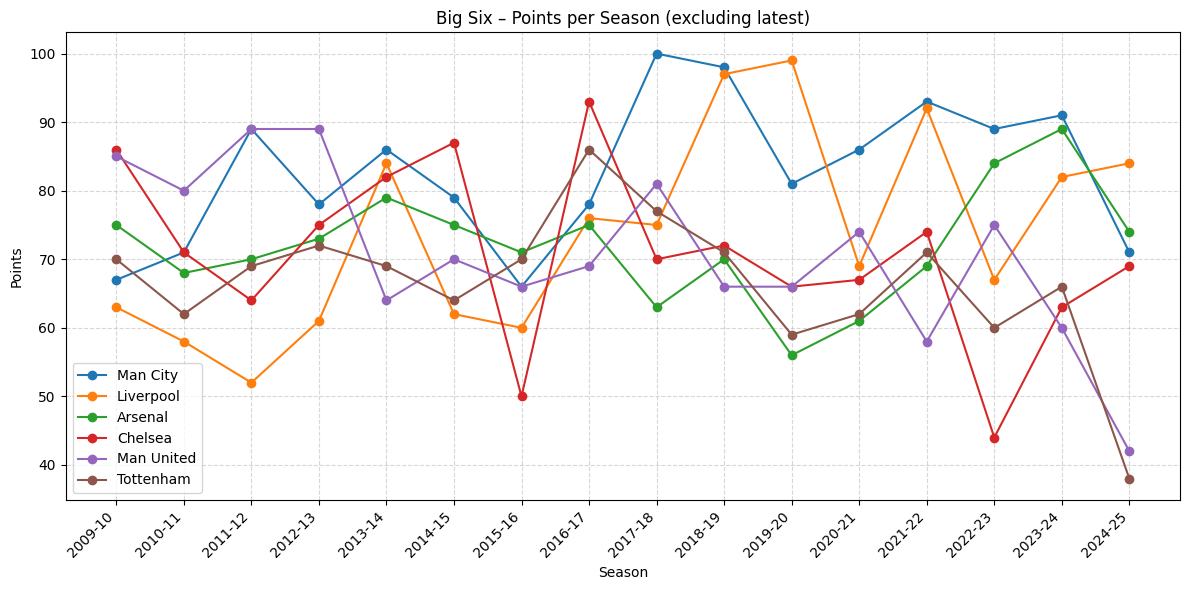

In [110]:
BIG_SIX = ["Man City", "Liverpool", "Arsenal", "Chelsea", "Man United", "Tottenham"]

# make sure date/season exist
pl_15years["date"] = pd.to_datetime(pl_15years["date"], errors="coerce", dayfirst=True)

if "season" not in pl_15years.columns:
    yr = pl_15years["date"].dt.year
    pl_15years["season"] = np.where(
        pl_15years["date"].dt.month >= 8,
        yr.astype(str) + "-" + ((yr + 1) % 100).astype(str).str.zfill(2),
        (yr - 1).astype(str) + "-" + (yr % 100).astype(str).str.zfill(2),
    )

# helper: points from results
def get_points(result, side):
    if side == "home":
        return np.where(result == "H", 3, np.where(result == "D", 1, 0))
    else:
        return np.where(result == "A", 3, np.where(result == "D", 1, 0))

# calculate points
pl_15years["home_points"] = get_points(pl_15years["full_time_result"], "home")
pl_15years["away_points"] = get_points(pl_15years["full_time_result"], "away")

# team-season total points
home_pts = pl_15years.groupby(["season","home_team"])["home_points"].sum()
away_pts = pl_15years.groupby(["season","away_team"])["away_points"].sum()
season_points = home_pts.add(away_pts, fill_value=0).reset_index()
season_points = season_points.rename(columns={"home_team":"team",0:"points"})
season_points = season_points.rename(columns={season_points.columns[1]:"team", season_points.columns[2]:"points"})

# remove the latest season
latest_season = season_points["season"].max()
season_points = season_points[season_points["season"] != latest_season]

# keep only Big Six
big6_points = season_points[season_points["team"].isin(BIG_SIX)]

# pivot for plotting
pivot = big6_points.pivot(index="season", columns="team", values="points").sort_index()

# plot
plt.figure(figsize=(12,6))
for team in BIG_SIX:
    if team in pivot.columns:
        plt.plot(pivot.index, pivot[team], marker="o", label=team)

plt.title("Big Six – Points per Season (excluding latest)")
plt.xlabel("Season")
plt.ylabel("Points")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## Big Six Cumulative Points Over Time

This visualization shows the **cumulative point accumulation** for Big Six teams across all 15 years. It reveals:

**Insights to Observe:**
- **Slope Changes**: Periods of excellent vs. poor form
- **Relative Positioning**: How teams separate over time
- **Consistency**: Steady climbers vs. volatile performers
- **Inflection Points**: When did power shifts occur?

The steepness of each line indicates the rate of point accumulation - steeper = more successful periods.

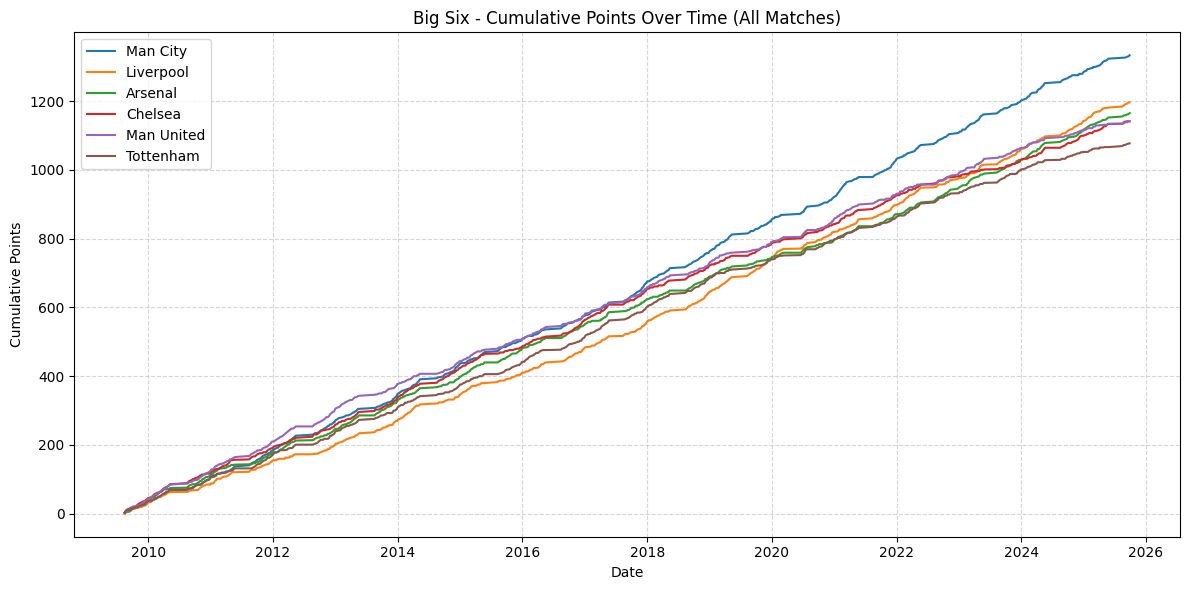

In [116]:
# ensure date is datetime
pl_15years["date"] = pd.to_datetime(pl_15years["date"], errors="coerce", dayfirst=True)

# calculate points per match
pl_15years["home_points"] = np.select(
    [pl_15years["full_time_result"].eq("H"),
     pl_15years["full_time_result"].eq("D")],
    [3,1], default=0
)
pl_15years["away_points"] = np.select(
    [pl_15years["full_time_result"].eq("A"),
     pl_15years["full_time_result"].eq("D")],
    [3,1], default=0
)

# put home/away into same column
home = pl_15years[["date","home_team","home_points"]].rename(
    columns={"home_team":"team","home_points":"points"}
)
away = pl_15years[["date","away_team","away_points"]].rename(
    columns={"away_team":"team","away_points":"points"}
)
matches = pd.concat([home,away], ignore_index=True)

# cumulative points over time
matches = matches.sort_values("date")
matches["cumulative_points"] = matches.groupby("team")["points"].cumsum()

# filter Big Six
big6 = matches[matches["team"].isin(BIG_SIX)]

# plot
plt.figure(figsize=(12,6))
for team in BIG_SIX:
    team_data = big6[big6["team"]==team]
    plt.plot(team_data["date"], team_data["cumulative_points"], label=team)

plt.title("Big Six - Cumulative Points Over Time (All Matches)")
plt.xlabel("Date")
plt.ylabel("Cumulative Points")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## Key Findings and Conclusions

### 15-Year Premier League Landscape Summary:

**Dominant Forces:**
- The cumulative points table reveals the true Premier League hierarchy
- Manchester City's transformation from mid-table to dominant force
- Liverpool and Arsenal's sustained excellence across different eras

**Notable Patterns:**
- **Big Six Separation**: Clear gap between traditional top 6 and rest
- **Cyclical Performance**: Teams showing peaks and troughs over 15 years
- **New Money Impact**: How financial investment translates to on-field success

**Statistical Insights:**
- Average points per season reveals team consistency
- Shot statistics show evolution of attacking philosophy
- Foul patterns indicate changes in defensive approaches

### Future Analysis Opportunities:
1. **Seasonal Variance**: Which teams are most/least consistent?
2. **Home vs Away**: How has home advantage evolved?
3. **Manager Impact**: Correlation between managerial changes and performance
4. **Transfer Spending**: ROI analysis of major signings

This foundational analysis sets the stage for deeper tactical, financial, and strategic insights into the Premier League's evolution over 15 transformative years.

---

**Next Steps:** Part 2 will dive deeper into seasonal analysis, head-to-head records, and predictive modeling based on these historical patterns.